In [1]:
import pandas as pd
import numpy as np

In [2]:
vgsales_df = pd.read_csv('vgsales.csv')

vgsales_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
vgsales_df.shape

(16719, 16)

In [4]:
vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
vgsales_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

## Part 1

#### • What are the top 5 games by global sales?  

In [10]:
sorted_games = vgsales_df.sort_values(by='Global_Sales', ascending = False)

top_5_games = sorted_games.head(5)

top_5_games[['Name', 'Global_Sales']]

,Name,Global_Sales
0,Wii Sports,82.53
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
4,Pokemon Red/Pokemon Blue,31.37


In [61]:
top_5_games[['Name', 'Global_Sales', 'Platform']]

,Name,Global_Sales,Platform
0,Wii Sports,82.53,Wii
1,Super Mario Bros.,40.24,NES
2,Mario Kart Wii,35.52,Wii
3,Wii Sports Resort,32.77,Wii
4,Pokemon Red/Pokemon Blue,31.37,GB


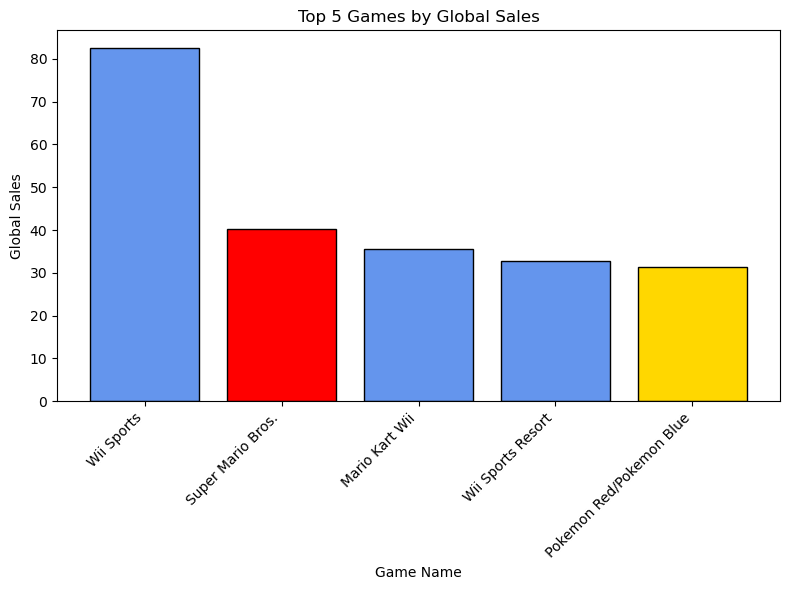

In [60]:
import matplotlib.pyplot as plt

colors = ['cornflowerblue', 'red', 'cornflowerblue', 'cornflowerblue', 'gold']
plt.figure(figsize=(8, 6))

plt.bar(top_5_games['Name'], top_5_games['Global_Sales'], color = colors,edgecolor = "black", linewidth = 1)
plt.xlabel('Game Name')
plt.ylabel('Global Sales')
plt.title('Top 5 Games by Global Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Grafiği gösterme
plt.show()

Yukarida ki grafikte veri setimizde yer alan oyunlarin, globeldeki en fazla satis yapilan 5 oyunu gormekteyiz, ayrica secilen renkler oyunlarin ve platformlara ozgun olarak secilmistir.

#### • Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014? 

In [66]:
# Selecting data from the years 2010-2014
filtered_df = vgsales_df[(vgsales_df['Year_of_Release'] >= 2010) & (vgsales_df['Year_of_Release'] <= 2014)]

# Calculate the correlation between the "na_sales" and "jp_sales" columns
correlation = filtered_df['NA_Sales'].corr(filtered_df['JP_Sales'])
correlation

0.26043134778810034

Correlation coefficient is a statistical measure that measures the strength and direction of the relationship between two variables. It takes a value between -1 and 1.<br>
Coefficient value:<br>
The closer it gets to 1, the stronger and more positive the relationship between variables is. That is, as one variable increases, the other variable also increases.<br>
As it approaches -1, the relationship between variables is stronger and more negative. That is, as one variable increases, the other variable decreases.<br>
Closer to 0, the relationship between variables is weak or non-existent.

The correlation coefficient between variables such as "na_sales" and "jp_sales" is 0.26, the relationship between the variables is weak. So we cannot say that as North American sales increase, Japan sales will generally increase as well.

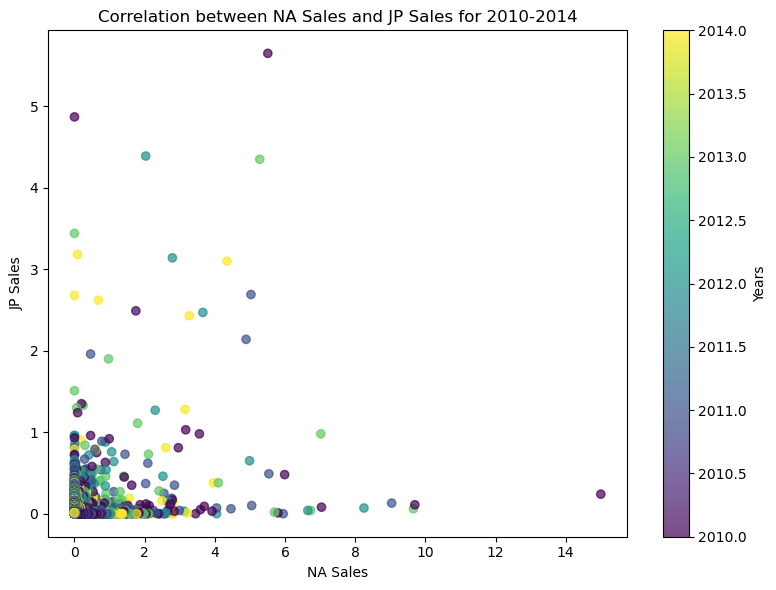

In [85]:
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['NA_Sales'], filtered_df['JP_Sales'],c=filtered_df['Year_of_Release'], cmap='viridis', alpha=0.7)

plt.xlabel('NA Sales')
plt.ylabel('JP Sales')
plt.title('Correlation between NA Sales and JP Sales for 2010-2014')
plt.colorbar(label='Years')
plt.tight_layout()

plt.show()

ayrica yukaridaki grafiktede bu iki grubun korolasyonunun yillara gore degiskenligini de gorebilirsiniz